In [115]:
%matplotlib inline
%reset
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.patches as patches
from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt, animation
#import datetime as dati
#import os
#import warnings 
from math import sqrt, pi, cos

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Files and paths

In [116]:
path = "D:\\OceanParcels"
final_path = path + "\\data\\final grids\\final_" # final grids
fig_path = path + "\\outputs\\figures_2\\"
coords = path + "\\data\\coordinates.nc"
sc_path = path + "\\data\\scenario data\\"

scenario = np.array(["S0", "S1", "S2", "S3", "S4", "S5", "S6"])
mon = np.array(["may", "jun", "jul", "aug", "sep", "oct"])

## Basic stuff

In [117]:
dsc = xr.open_dataset(coords, decode_times = False).load()
dsc.close()

botz = dsc.botz.values*-1
longitudes = dsc.lon_grid.values[0,:]
latitudes = dsc.lat_grid.values[:,0]

del dsc

In [118]:
longitudes

array([147.5776 , 147.57637, 147.57515, 147.57391, 147.57268, 147.57146,
       147.57022, 147.569  , 147.56776, 147.56653, 147.5653 , 147.56407,
       147.56285, 147.56161, 147.5604 , 147.55916, 147.55792, 147.5567 ,
       147.55547, 147.55424, 147.55301, 147.55177, 147.55055, 147.54932,
       147.5481 , 147.54686, 147.54564, 147.5444 , 147.54317, 147.54195,
       147.54071, 147.53949, 147.53825, 147.53702, 147.5358 , 147.53456,
       147.53334, 147.5321 , 147.53088, 147.52965, 147.52841, 147.52719,
       147.52596], dtype=float32)

## The general big figure

In [119]:
%%script echo Skipped!

fmt = lambda x, pos: '{:.2f}'.format(x, pos)

# Within canopy
fig = plt.figure(figsize = (6.5, 5), constrained_layout = True)
ax = plt.axes() 
botplot = ax.pcolormesh(longitudes, latitudes, botz, cmap = 'viridis_r')

# All the formatting
yticks = ax.get_ylim()
ax.set_yticks((np.linspace(yticks[0]+0.002, yticks[1]-0.002, 5)))
xticks = ax.get_xlim()
ax.set_xticks((np.linspace(xticks[0]+0.005, xticks[1]-0.005, 5)))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax.set_ylabel("Latitude ($^\circ$N)")
ax.set_xlabel("Longitude ($^\circ$E)")
plt.colorbar(botplot, label = "Depth (m)")

plt.show()
# fig.savefig(fig_path + "grid_final.png")

Skipped!


## Scenarios (the red square figures)

There are 9 canopies per scenario.

In [120]:
%%script echo Skipped!

sc = 6

starts = np.zeros(shape = (2, 9))
widhei = np.zeros(shape = (2, 9))

# Create array of scenario canopies coordinates
dscen = np.squeeze(
    np.genfromtxt("../../Scenarios - mac position files/indices for OP/"+scenario[sc]+".csv", delimiter = ","))
print(dscen)
for n in range(9):
    ai = int(dscen[n,0])
    bi = int(dscen[n,1])+1
    aj = int(dscen[n,2])
    bj = int(dscen[n,3])+1
    starts[:,n] = longitudes[ai-1], latitudes[aj-1]
    widhei[:,n] = longitudes[bi-1]-longitudes[ai-1], latitudes[bj-1]-latitudes[aj-1]

Skipped!


In [121]:
%%script echo Skipped!

# Creat rectangles
def canopy(i):
    rect = patches.Rectangle((starts[:,i]), widhei[0,i], widhei[1,i], 
                             linewidth = 1, edgecolor = 'k', facecolor = 'r',alpha = 0.5)
    return rect

fmt = lambda x, pos: '{:.2f}'.format(x, pos)

# Within canopy
fig = plt.figure(figsize = (4.25, 3), constrained_layout = True)
ax = plt.axes() 
botplot = ax.pcolormesh(longitudes, latitudes, botz, cmap = 'viridis_r')

# Add the patches to the axes
ax.add_patch(canopy(0))
ax.add_patch(canopy(1))
ax.add_patch(canopy(2))
ax.add_patch(canopy(3))
ax.add_patch(canopy(4))
ax.add_patch(canopy(5))
ax.add_patch(canopy(6))
ax.add_patch(canopy(7))
ax.add_patch(canopy(8))

# All the formatting
yticks = ax.get_ylim()
ax.set_yticks((np.linspace(yticks[0]+0.002, yticks[1]-0.002, 5)))
xticks = ax.get_xlim()
ax.set_xticks((np.linspace(xticks[0]+0.005, xticks[1]-0.005, 5)))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax.set_ylabel("Latitude ($^\circ$N)")
ax.set_xlabel("Longitude ($^\circ$E)")
plt.colorbar(botplot, label = "Depth (m)")

plt.show()
# fig.savefig(fig_path + "grid_" + scenario[sc] + "_s.png")

Skipped!


## Figuring out limits

In [122]:
%%script echo Skipped!

UV_lims = np.empty(shape = (2,6))
#att_lims = np.empty(shape = (2,6))

# Find mins and maxes
for mo in range(6):
    
    UV_lims0 = np.empty(shape = (2,7))
    #att_lims0 = np.empty(shape = (2,7))
    
    for sc in range(7):
        runname = mon[mo] + "_" + scenario[sc]
        ds1name = final_path + runname + "_1.nc"

        ds1 = xr.open_dataset(ds1name, decode_times = False).load()
        ds1.close()

        #tt = sum(np.shape(ds1.times_secs.values))
        # One week in the middle?
        timeslice1 = 3636
        timeslice2 = 3708
        
        # UV slice (for UV plots)
        slice_U = np.nanmean(ds1.U_atten.values[timeslice1:timeslice2,:,0:41,0:42], axis = 0)
        slice_V = np.nanmean(ds1.V_atten.values[timeslice1:timeslice2,:,0:41,0:42], axis = 0)
        
        canopy_UV = np.sqrt(np.power(slice_U[4:,:,:],2) + np.power(slice_V[4:,:,:],2))
        canopy_UV = np.nanmean(canopy_UV, axis = 0)
        
        UV_lims0[:,sc] = (np.nanmax(canopy_UV), np.nanmin(canopy_UV))
        
        # Attenuation (for atten plots)
        #slice_atten = ds1.uc_ub.values[timeslice1:timeslice2,:,0:41,0:42]
        
        #atten = ds1.uc_ub.values[timeslice1:timeslice2,:,0:40,0:41]
        #canopy_atten = np.mean(atten[4:10,:,:], axis = 0)
        #under_atten = np.concatenate((atten[:3,:,:], atten[11:,:,:]), axis = 0)
        #under_atten = np.nanmean(under_atten, axis = 0)
        
        #att_lims0[:,sc] = (np.nanmax([canopy_atten, under_atten]), np.nanmin([canopy_atten, under_atten]))

        del ds1, slice_U, slice_V, #slice_UV, #atten, canopy_atten, under_atten
        print(runname, " done")
        
    UV_lims[:,mo] = (np.nanmax(UV_lims0), np.nanmin(UV_lims0))
    #att_lims[:,mo] = (np.nanmax(att_lims0), np.nanmin(att_lims0))

maxUV_slice = np.nanmax(UV_lims)
minUV_slice = np.nanmin(UV_lims)
#maxAtten = np.nanmax(att_lims)
#minAtten = np.nanmin(att_lims)
    
print(maxUV_slice, minUV_slice)
#print(maxAtten, minAtten)

Skipped!


# Some pretty plots

These are just to get a look at what the flow fields look like.

In [123]:
maxUV_slice = 0.19 # 0.188592
minUV_slice = 0.02
maxAtten = 1.2    # 1.183072 
minAtten = 0.2    # 0.226512

from matplotlib.ticker import FormatStrFormatter
fmt = lambda x, pos: '{:.2f}'.format(x, pos)

D:\OceanParcels\data\final grids\final_may_S0_1.nc


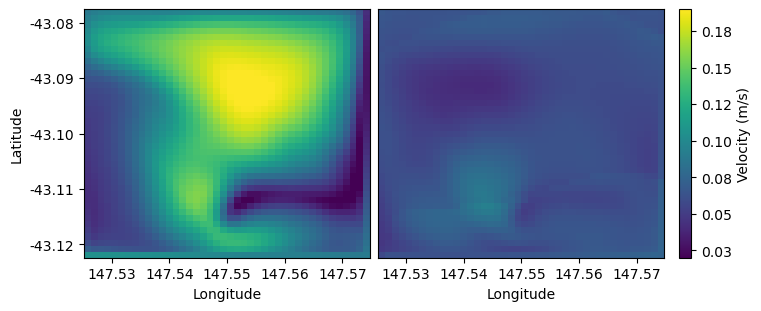

D:\OceanParcels\data\final grids\final_may_S1_1.nc


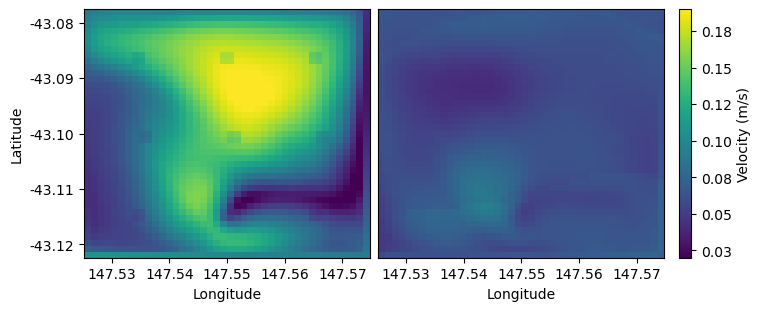

D:\OceanParcels\data\final grids\final_may_S2_1.nc


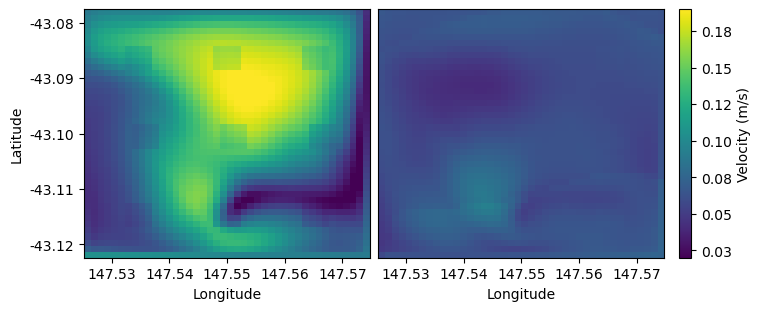

D:\OceanParcels\data\final grids\final_may_S3_1.nc


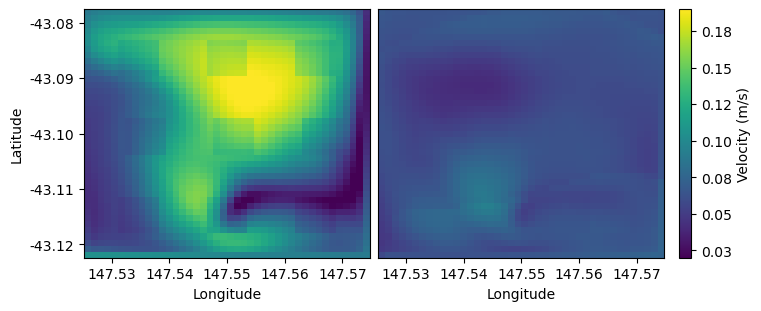

D:\OceanParcels\data\final grids\final_may_S4_1.nc


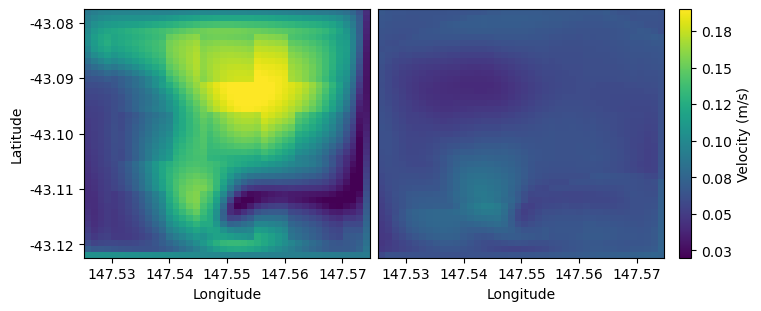

D:\OceanParcels\data\final grids\final_may_S5_1.nc


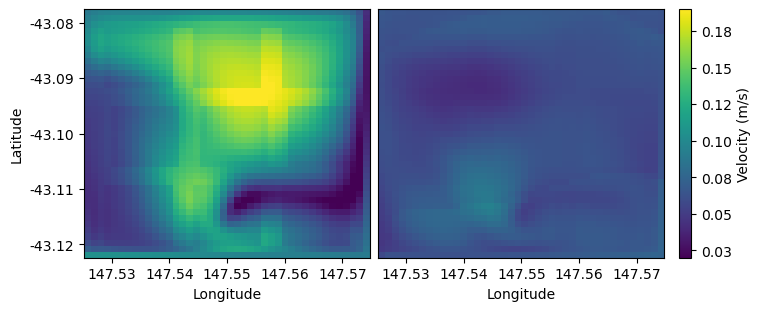

D:\OceanParcels\data\final grids\final_may_S6_1.nc


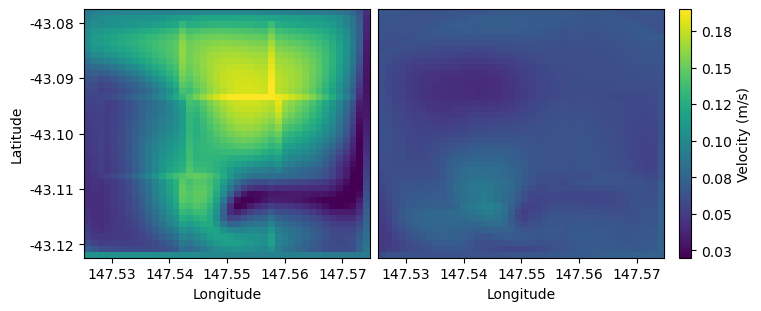

D:\OceanParcels\data\final grids\final_jun_S0_1.nc


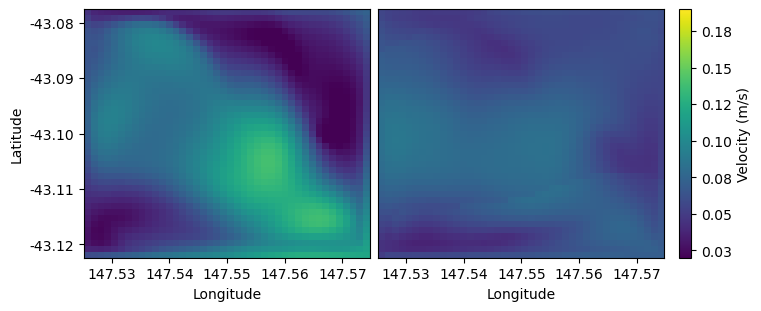

D:\OceanParcels\data\final grids\final_jun_S1_1.nc


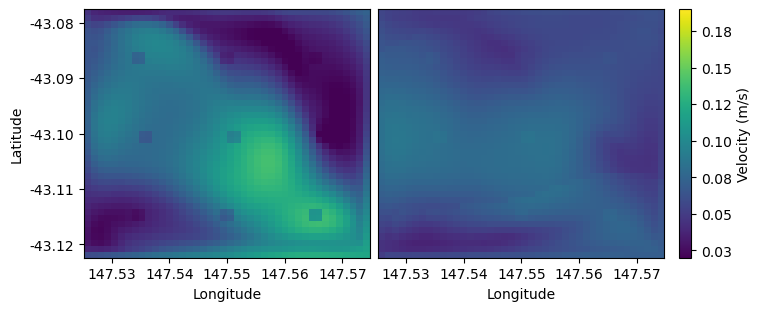

D:\OceanParcels\data\final grids\final_jun_S2_1.nc


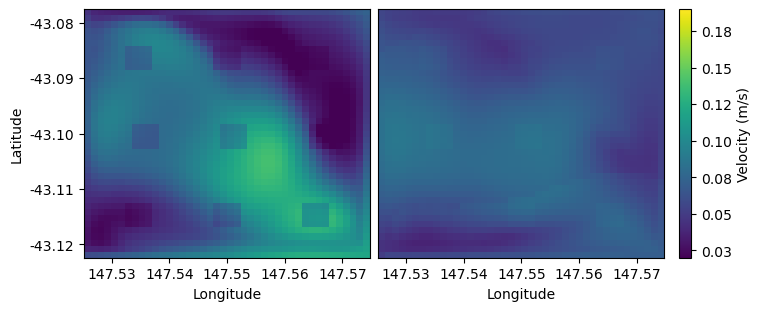

D:\OceanParcels\data\final grids\final_jun_S3_1.nc


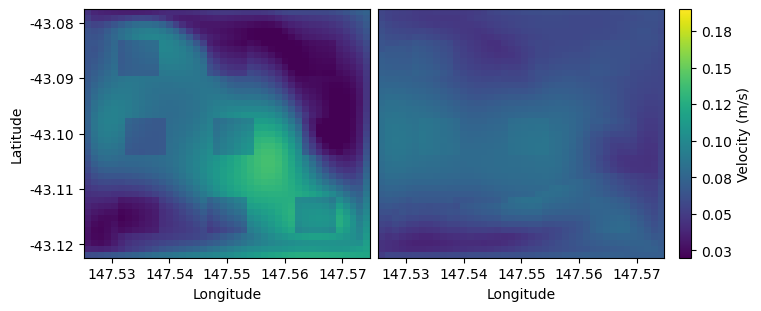

D:\OceanParcels\data\final grids\final_jun_S4_1.nc


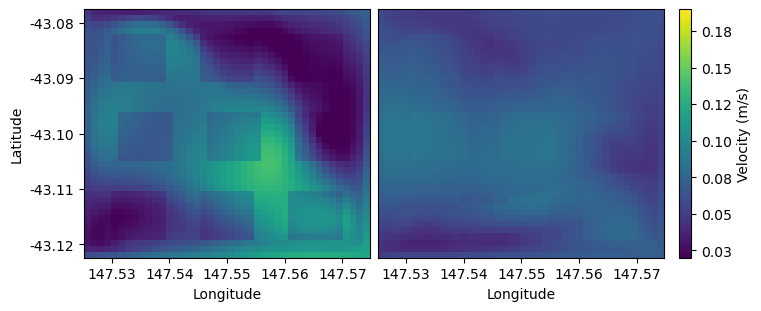

D:\OceanParcels\data\final grids\final_jun_S5_1.nc


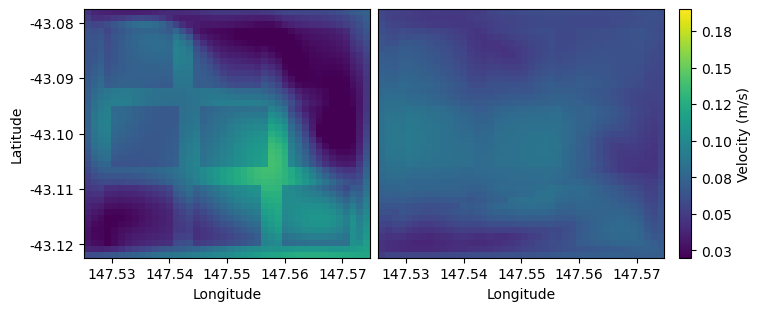

D:\OceanParcels\data\final grids\final_jun_S6_1.nc


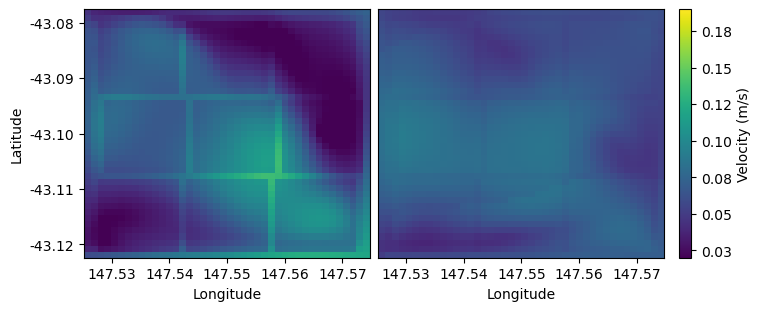

D:\OceanParcels\data\final grids\final_jul_S0_1.nc


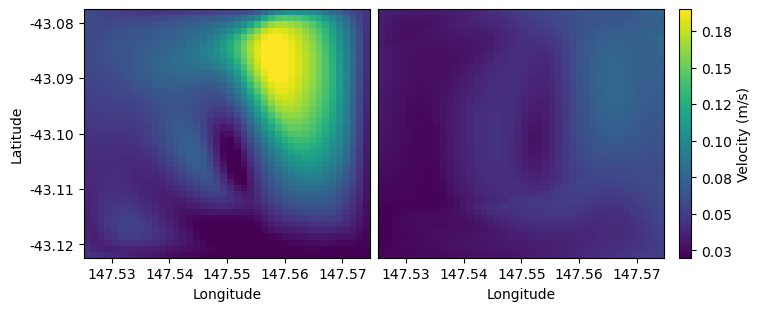

D:\OceanParcels\data\final grids\final_jul_S1_1.nc


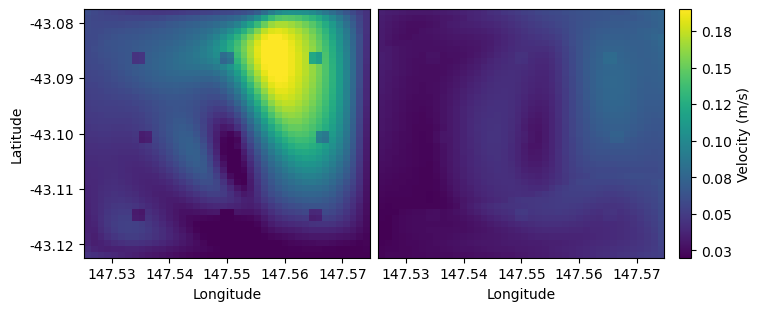

D:\OceanParcels\data\final grids\final_jul_S2_1.nc


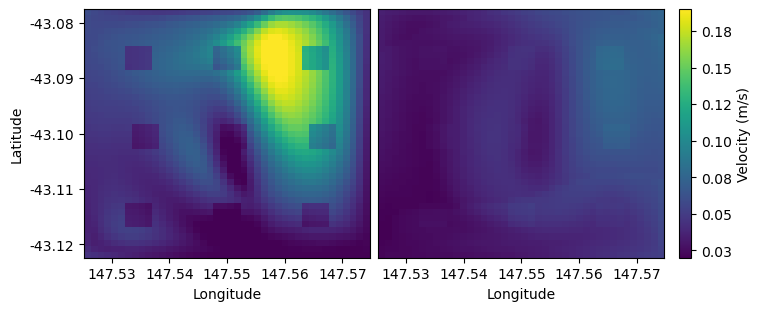

D:\OceanParcels\data\final grids\final_jul_S3_1.nc


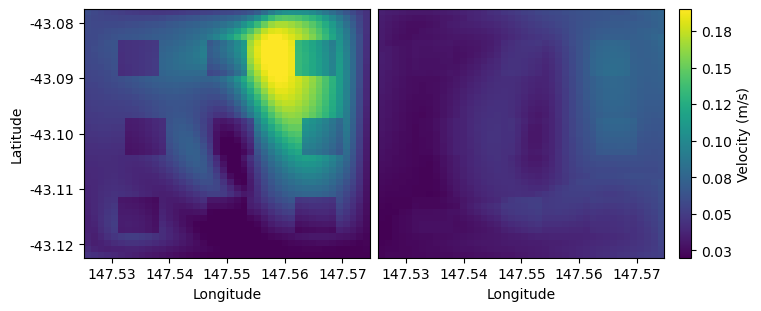

D:\OceanParcels\data\final grids\final_jul_S4_1.nc


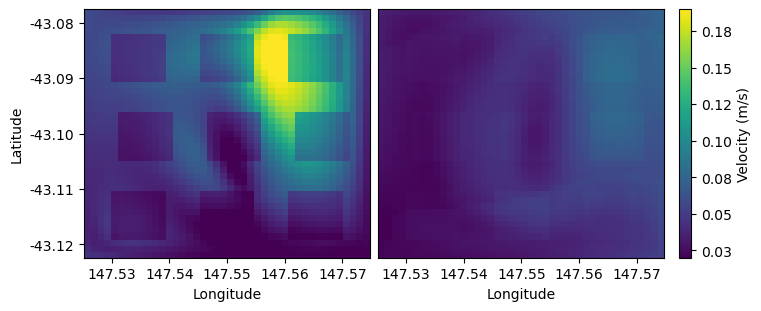

D:\OceanParcels\data\final grids\final_jul_S5_1.nc


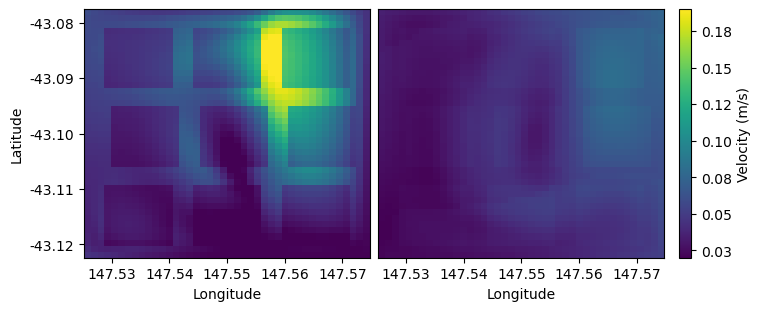

D:\OceanParcels\data\final grids\final_jul_S6_1.nc


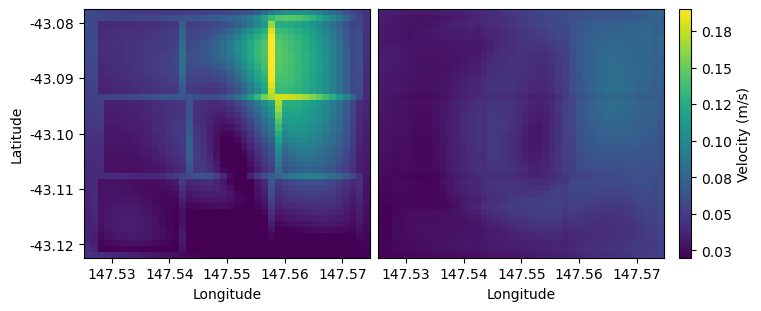

D:\OceanParcels\data\final grids\final_aug_S0_1.nc


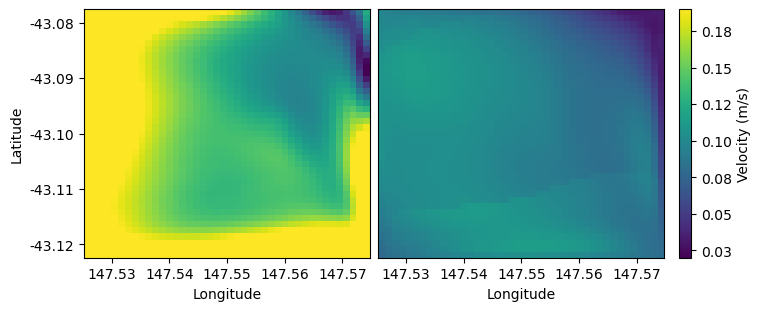

D:\OceanParcels\data\final grids\final_aug_S1_1.nc


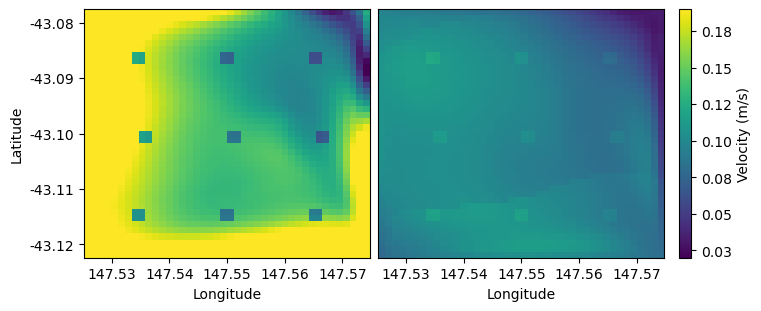

D:\OceanParcels\data\final grids\final_aug_S2_1.nc


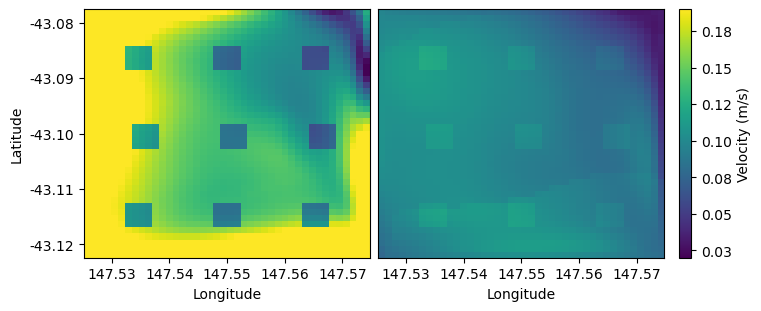

D:\OceanParcels\data\final grids\final_aug_S3_1.nc


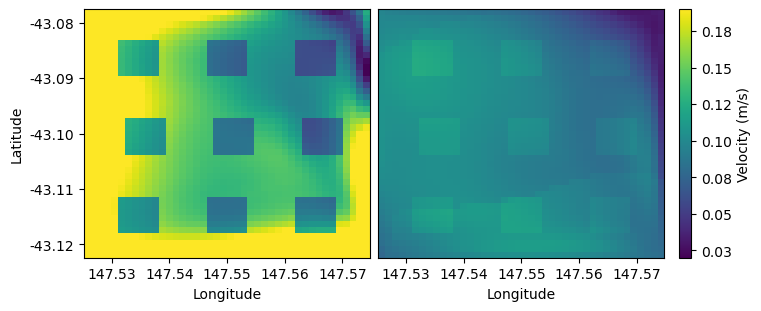

D:\OceanParcels\data\final grids\final_aug_S4_1.nc


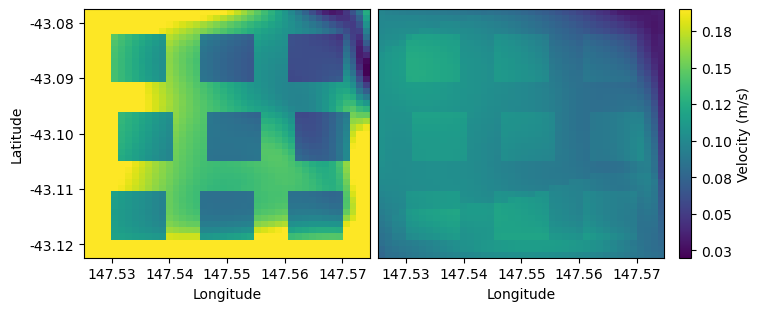

D:\OceanParcels\data\final grids\final_aug_S5_1.nc


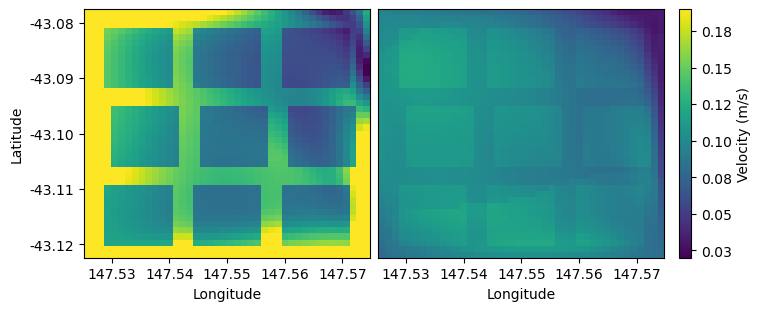

D:\OceanParcels\data\final grids\final_aug_S6_1.nc


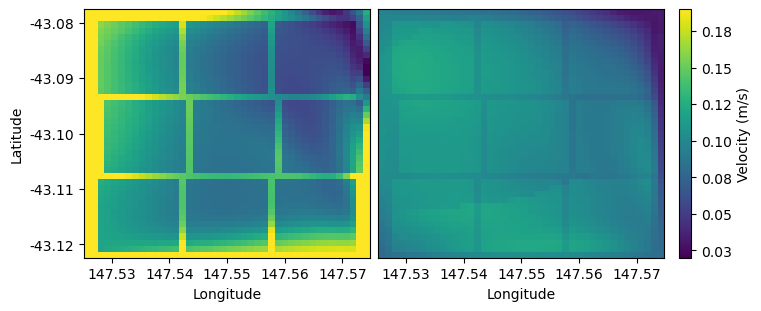

D:\OceanParcels\data\final grids\final_sep_S0_1.nc


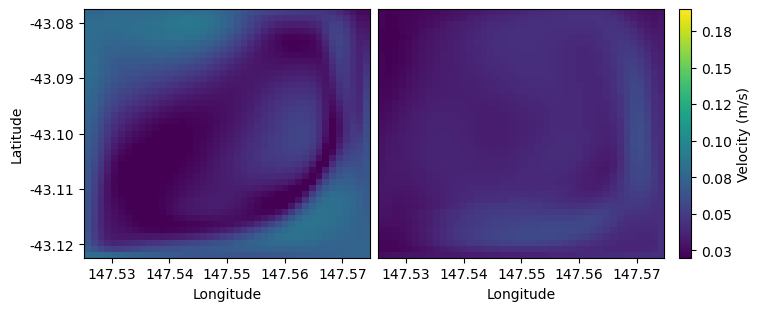

D:\OceanParcels\data\final grids\final_sep_S1_1.nc


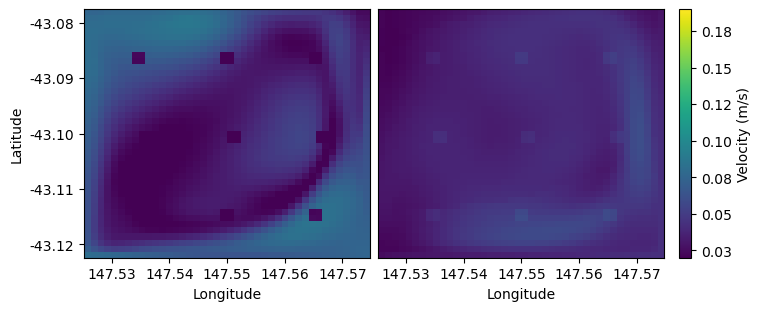

D:\OceanParcels\data\final grids\final_sep_S2_1.nc


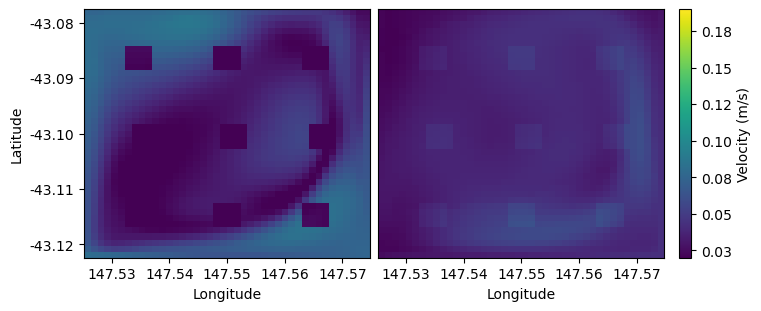

D:\OceanParcels\data\final grids\final_sep_S3_1.nc


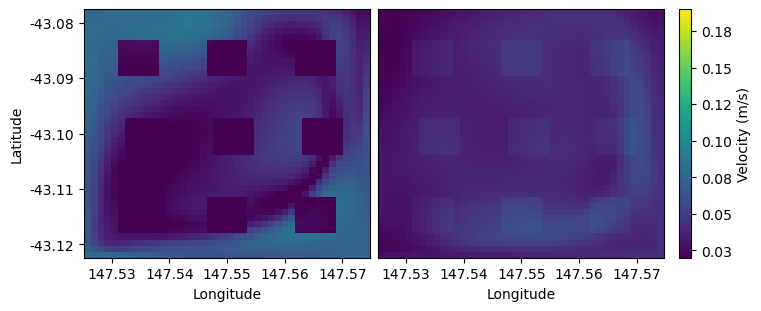

D:\OceanParcels\data\final grids\final_sep_S4_1.nc


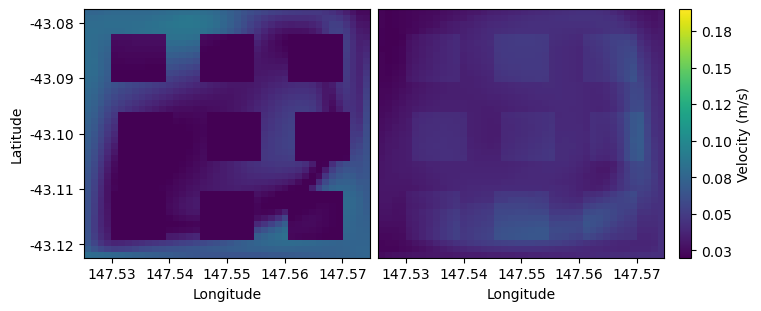

D:\OceanParcels\data\final grids\final_sep_S5_1.nc


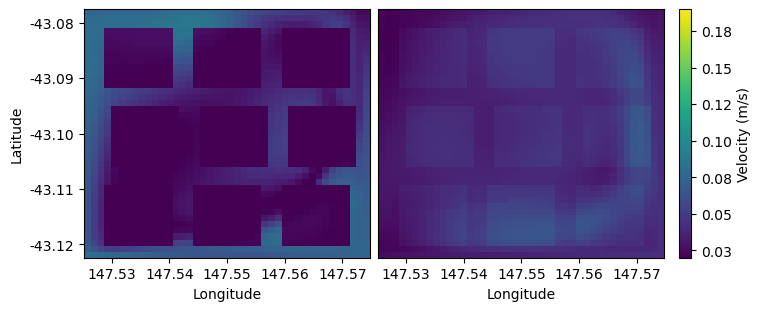

D:\OceanParcels\data\final grids\final_sep_S6_1.nc


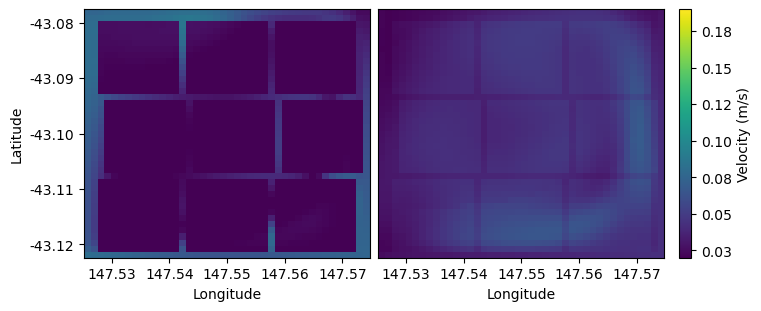

D:\OceanParcels\data\final grids\final_oct_S0_1.nc


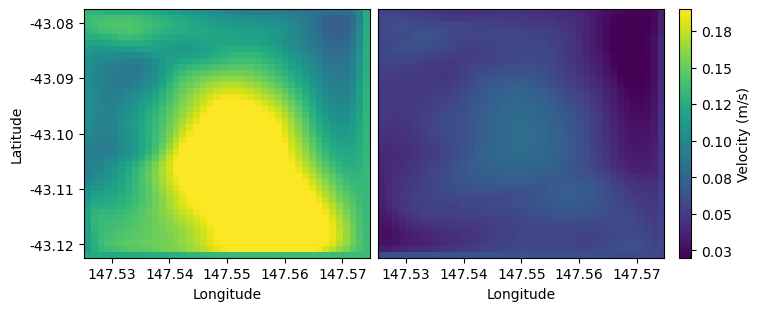

D:\OceanParcels\data\final grids\final_oct_S1_1.nc


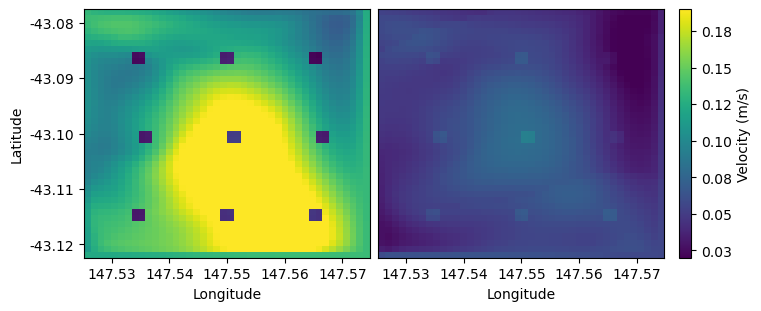

D:\OceanParcels\data\final grids\final_oct_S2_1.nc


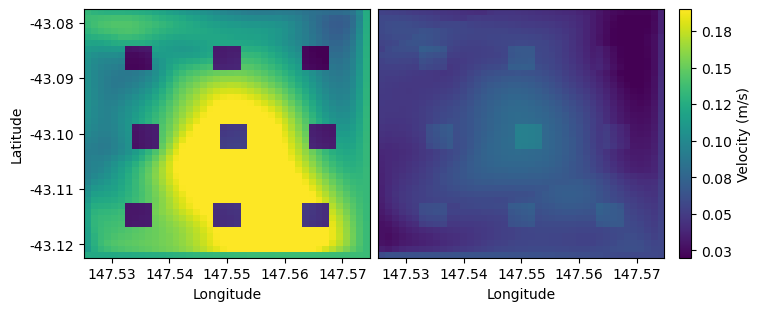

D:\OceanParcels\data\final grids\final_oct_S3_1.nc


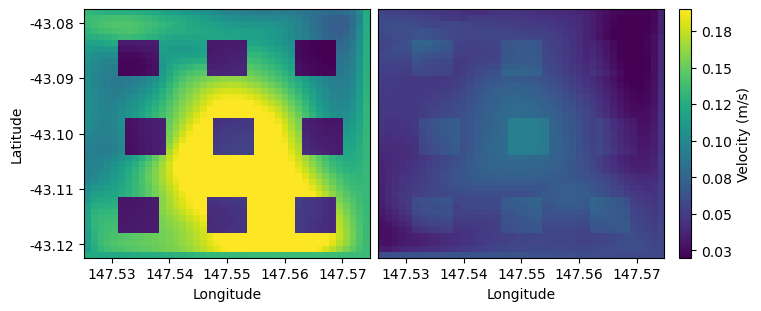

D:\OceanParcels\data\final grids\final_oct_S4_1.nc


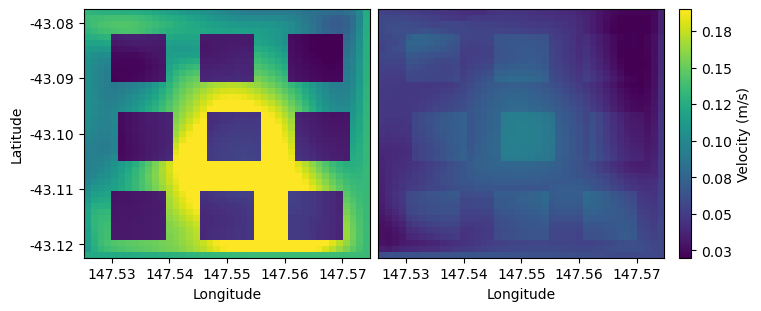

D:\OceanParcels\data\final grids\final_oct_S5_1.nc


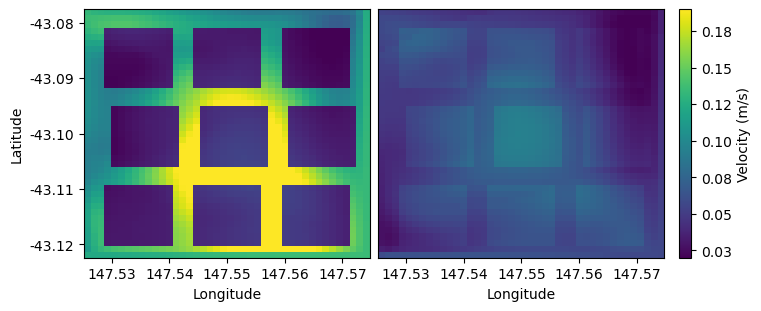

D:\OceanParcels\data\final grids\final_oct_S6_1.nc


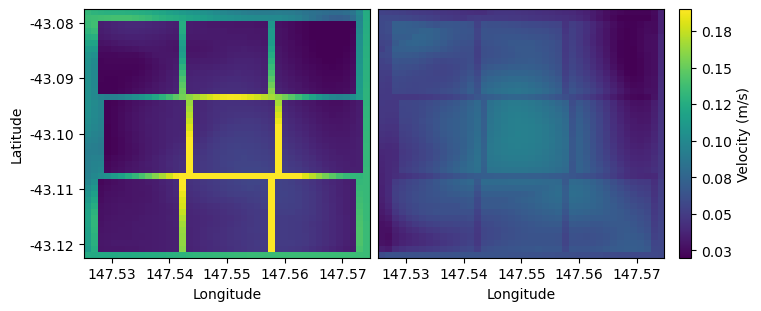

In [124]:
for mo in range(6):
    for sc in range(7):
        runname = mon[mo] + "_" + scenario[sc]
        ds1name = final_path + runname + "_1.nc"
        print(ds1name)

        # ds1 contains the data
        ds1 = xr.open_dataset(ds1name, decode_times = False).load()
        ds1.close()

        #tt = sum(np.shape(ds1.times_secs.values))
        timeslice1 = 3636
        timeslice2 = 3708

        slice_U = np.nanmean(ds1.U_atten.values[timeslice1:timeslice2,:,0:41,0:42], axis = 0)
        slice_V = np.nanmean(ds1.V_atten.values[timeslice1:timeslice2,:,0:41,0:42], axis = 0)

        under_UV = np.sqrt(np.power(slice_U[11:,:,:],2) + np.power(slice_V[11:,:,:],2))
        under_UV = np.nanmean(under_UV, axis = 0)
        canopy_UV = np.sqrt(np.power(slice_U[4:10,:,:],2) + np.power(slice_V[4:10,:,:],2))
        canopy_UV = np.nanmean(canopy_UV, axis = 0)

        # UV within and under the canopy
        fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (7.5, 3), constrained_layout = True)
        canopy_plot = ax1.pcolormesh(longitudes, latitudes, canopy_UV, vmax = maxUV_slice, vmin = minUV_slice)
        under_plot = ax2.pcolormesh(longitudes, latitudes, under_UV, vmax = maxUV_slice, vmin = minUV_slice)

        # All the formatting
        yticks = ax1.get_ylim()
        ax1.set_yticks((np.linspace(yticks[0]+0.002, yticks[1]-0.002, 5)))
        xticks = ax1.get_xlim()
        ax1.set_xticks((np.linspace(xticks[0]+0.005, xticks[1]-0.005, 5)))
        ax2.set_xticks((np.linspace(xticks[0]+0.005, xticks[1]-0.005, 5)))
        ax2.tick_params(left=False, labelleft=False)
        ax1.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
        ax1.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
        ax2.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
        ax1.set_ylabel("Latitude")
        ax1.set_xlabel("Longitude")
        ax2.set_xlabel("Longitude")
        plt.colorbar(under_plot, label = "Velocity (m/s)", format=matplotlib.ticker.FuncFormatter(fmt))

        plt.show()
        fig.savefig(fig_path + "can_un_UV_" + runname + ".png")
        plt.close()

In [35]:
#print(np.nanmax([canopy_atten,under_atten]), np.nanmin([canopy_atten,under_atten]))
print(np.shape(slice_U), np.shape(longitudes), np.shape(latitudes))

(720, 22, 41, 43) (42,) (40,)


In [403]:
%%script echo Skipped!

# Attenuation
canopy_range = range(4,10)
under_range = range(11,21)
canopy_atten = np.nanmean(slice_atten[7,:,:], axis = (0))
under_atten = np.nanmean(slice_atten[15,:,:], axis = (0))

# Within & below canopy
fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (8.5, 3.5), constrained_layout = True)
canopy_plot = ax1.pcolormesh(longitudes, latitudes, canopy_atten, vmax = maxAtten, vmin = minAtten)
under_plot = ax2.pcolormesh(longitudes, latitudes, under_atten, vmax = maxAtten, vmin = minAtten)

# All the formatting
yticks = ax1.get_ylim()
ax1.set_yticks((np.linspace(yticks[0]+0.002, yticks[1]-0.002, 5)))
xticks = ax1.get_xlim()
ax1.set_xticks((np.linspace(xticks[0]+0.005, xticks[1]-0.005, 5)))
ax2.set_xticks((np.linspace(xticks[0]+0.005, xticks[1]-0.005, 5)))
ax2.tick_params(left=False, labelleft=False)
ax1.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax1.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax2.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(fmt))
ax1.set_ylabel("Latitude")
ax1.set_xlabel("Longitude")
ax2.set_xlabel("Longitude")
plt.colorbar(under_plot, label = "Relative attenuation")

plt.show()
fig.savefig(fig_path + "ucub_" + runname + ".png")

Skipped!
